# Dataset Download

# Libraries 

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import pickle
import cv2
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.utils.vis_utils import plot_model
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix

# Data Visualization

In [2]:
from google.colab import drive
drive.mount('/content/drive')
root_dir = '/content/drive/MyDrive/tomato/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/'

Mounted at /content/drive


In [45]:
# glob('/content/drive/MyDrive/ML Project/NewPlantDataset(Augmented)/train/Tomato___Bacterial_spot/*.JPG')
Bacterial_Spot = glob(root_dir+'train/Tomato___Bacterial_spot/*.JPG')
Early_Blight = glob(root_dir+'train/Tomato___Early_blight/*.JPG')
Late_Blight = glob(root_dir+'train/Tomato___Late_blight/*.JPG')
Leaf_Mold = glob(root_dir+'train/Tomato___Leaf_Mold/*.JPG')
Septoria_Leaf_Spot = glob(root_dir+'train/Tomato___Septoria_leaf_spot/*.JPG')
Spider_Mites = glob(root_dir+'train/Tomato___Spider_mites Two-spotted_spider_mite/*.JPG')
Target_Spot = glob(root_dir+'train/Tomato___Target_Spot/*.JPG')
Yellow_Leaf_Curl_Virus = glob(root_dir+'train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/*.JPG') 
Tomato_mosaic_Virus = glob(root_dir+'train/Tomato___Tomato_mosaic_virus/*.JPG')
Healthy = glob(root_dir+'train/Tomato___healthy/*.JPG')

In [3]:
diseases = os.listdir(root_dir+'train')
print(diseases)

['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Late_blight', 'Tomato___Target_Spot', 'Tomato___Leaf_Mold', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Septoria_leaf_spot', 'Tomato___Early_blight']


In [4]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 10


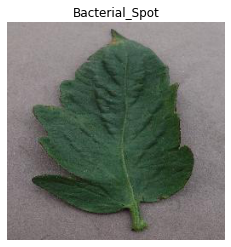

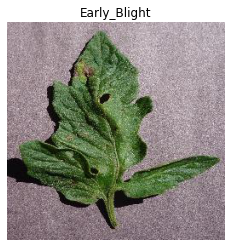

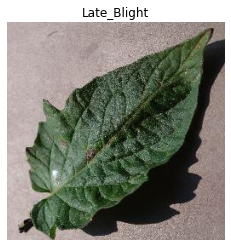

In [48]:
plt.title('Bacterial_Spot')
plt.imshow(image.load_img(np.random.choice(Bacterial_Spot)))
plt.axis('off')
plt.show()

plt.title('Early_Blight')
plt.imshow(image.load_img(np.random.choice(Early_Blight)))
plt.axis('off')
plt.show()

plt.title('Late_Blight')
plt.imshow(image.load_img(np.random.choice(Late_Blight)))
plt.axis('off')
plt.show()

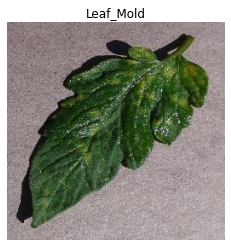

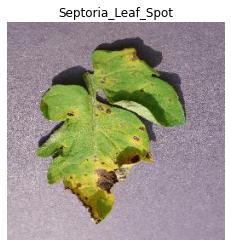

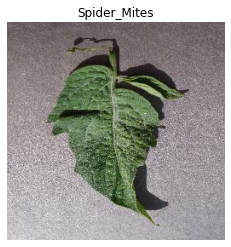

In [49]:
plt.title('Leaf_Mold')
plt.imshow(image.load_img(np.random.choice(Leaf_Mold)))
plt.axis('off')
plt.show()

plt.title('Septoria_Leaf_Spot')
plt.imshow(image.load_img(np.random.choice(Septoria_Leaf_Spot)))
plt.axis('off')
plt.show()

plt.title('Spider_Mites')
plt.imshow(image.load_img(np.random.choice(Spider_Mites)))
plt.axis('off')
plt.show()

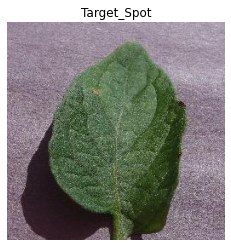

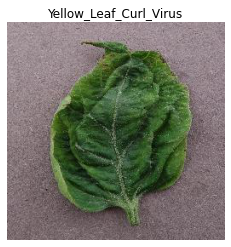

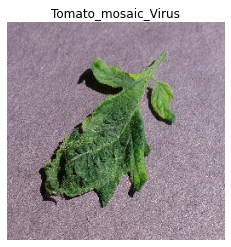

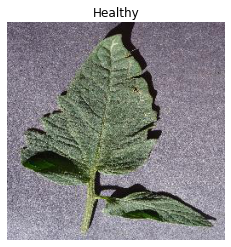

In [50]:
plt.title('Target_Spot')
plt.imshow(image.load_img(np.random.choice(Target_Spot)))
plt.axis('off')
plt.show()

plt.title('Yellow_Leaf_Curl_Virus')
plt.imshow(image.load_img(np.random.choice(Yellow_Leaf_Curl_Virus)))
plt.axis('off')
plt.show()

plt.title('Tomato_mosaic_Virus')
plt.imshow(image.load_img(np.random.choice(Tomato_mosaic_Virus)))
plt.axis('off')
plt.show()

plt.title('Healthy')
plt.imshow(image.load_img(np.random.choice(Healthy)))
plt.axis('off')
plt.show()

# Pre-Processing

In [5]:
img_width = 256
img_height = 256

datagen = ImageDataGenerator(rescale=1/255.0)

In [6]:
train_data_gen = datagen.flow_from_directory(directory=root_dir+'train',
                                             target_size = (img_width, img_height),
                                             class_mode = 'sparse')

Found 18345 images belonging to 10 classes.


In [7]:
vali_data_gen = datagen.flow_from_directory(directory=root_dir+'valid',
                                            target_size = (img_width, img_height),
                                             class_mode = 'sparse',)

Found 2634 images belonging to 10 classes.


In [8]:
print('Labels')
print(np.unique(train_data_gen.labels))
print(np.unique(vali_data_gen.labels))

print('\nTotal Labels')
print(len(np.unique(train_data_gen.labels)))
print(len(np.unique(vali_data_gen.labels)))


Labels
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]

Total Labels
10
10


# Deep Convolutional Model

In [56]:
model = Sequential()

#convolution 
model.add(Conv2D(64, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))


#Dense 
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))



model.add(Dense(10, activation='softmax'))

In [57]:
model.compile(optimizer=Adam(learning_rate=0.0001,decay=1e-6), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [58]:
r = model.fit_generator(generator=train_data_gen, 
                              steps_per_epoch=len(train_data_gen),
                              epochs=15, 
                              validation_data= vali_data_gen, 
                              validation_steps = len(vali_data_gen))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/15
574/574 [==============================] - 2847s 5s/step - loss: 1.2551 - sparse_categorical_accuracy: 0.5877 - val_loss: 1.8326 - val_sparse_categorical_accuracy: 0.4298
Epoch 2/15
574/574 [==============================] - 222s 387ms/step - loss: 0.6852 - sparse_categorical_accuracy: 0.7718 - val_loss: 1.2052 - val_sparse_categorical_accuracy: 0.6898
Epoch 3/15
574/574 [==============================] - 222s 386ms/step - loss: 0.4927 - sparse_categorical_accuracy: 0.8354 - val_loss: 0.4060 - val_sparse_categorical_accuracy: 0.8705
Epoch 4/15
574/574 [==============================] - 222s 387ms/step - loss: 0.3670 - sparse_categorical_accuracy: 0.8761 - val_loss: 0.9004 - val_sparse_categorical_accuracy: 0.7096
Epoch 5/15
574/574 [==============================] - 223s 388ms/step - loss: 0.3185 - sparse_categorical_accuracy: 0.8919 - val_loss: 0.2440 - val_sparse_categorical_accuracy: 0.9377
Epoch 6/15
574/574 [==============================] - 223s 388ms/step - loss: 0.25

# Analysis

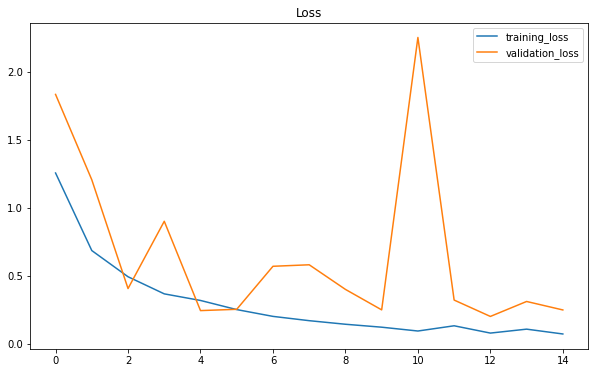

In [125]:
plt.figure(figsize=(10, 6))
plt.title('Loss')
plt.plot(r.history['loss'], label='training_loss')
plt.plot(r.history['val_loss'], label='validation_loss')
plt.legend()

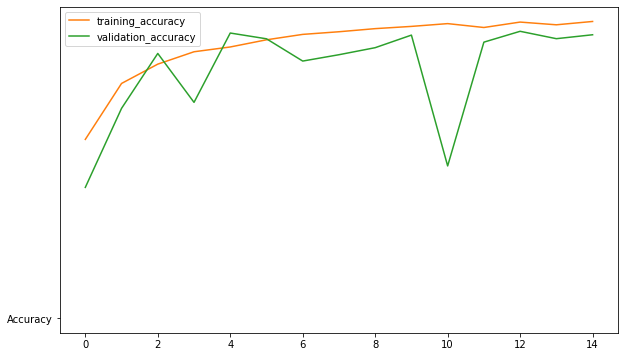

In [124]:
plt.figure(figsize=(10, 6))
plt.plot('Accuracy')
plt.plot(r.history['sparse_categorical_accuracy'], label='training_accuracy')
plt.plot(r.history['val_sparse_categorical_accuracy'], label='validation_accuracy')
plt.legend()

# Model Saving

In [61]:
model.save(root_dir+'tomato_disease.h5')

In [9]:
model = tf.keras.models.load_model(root_dir+'tomato_disease.h5')

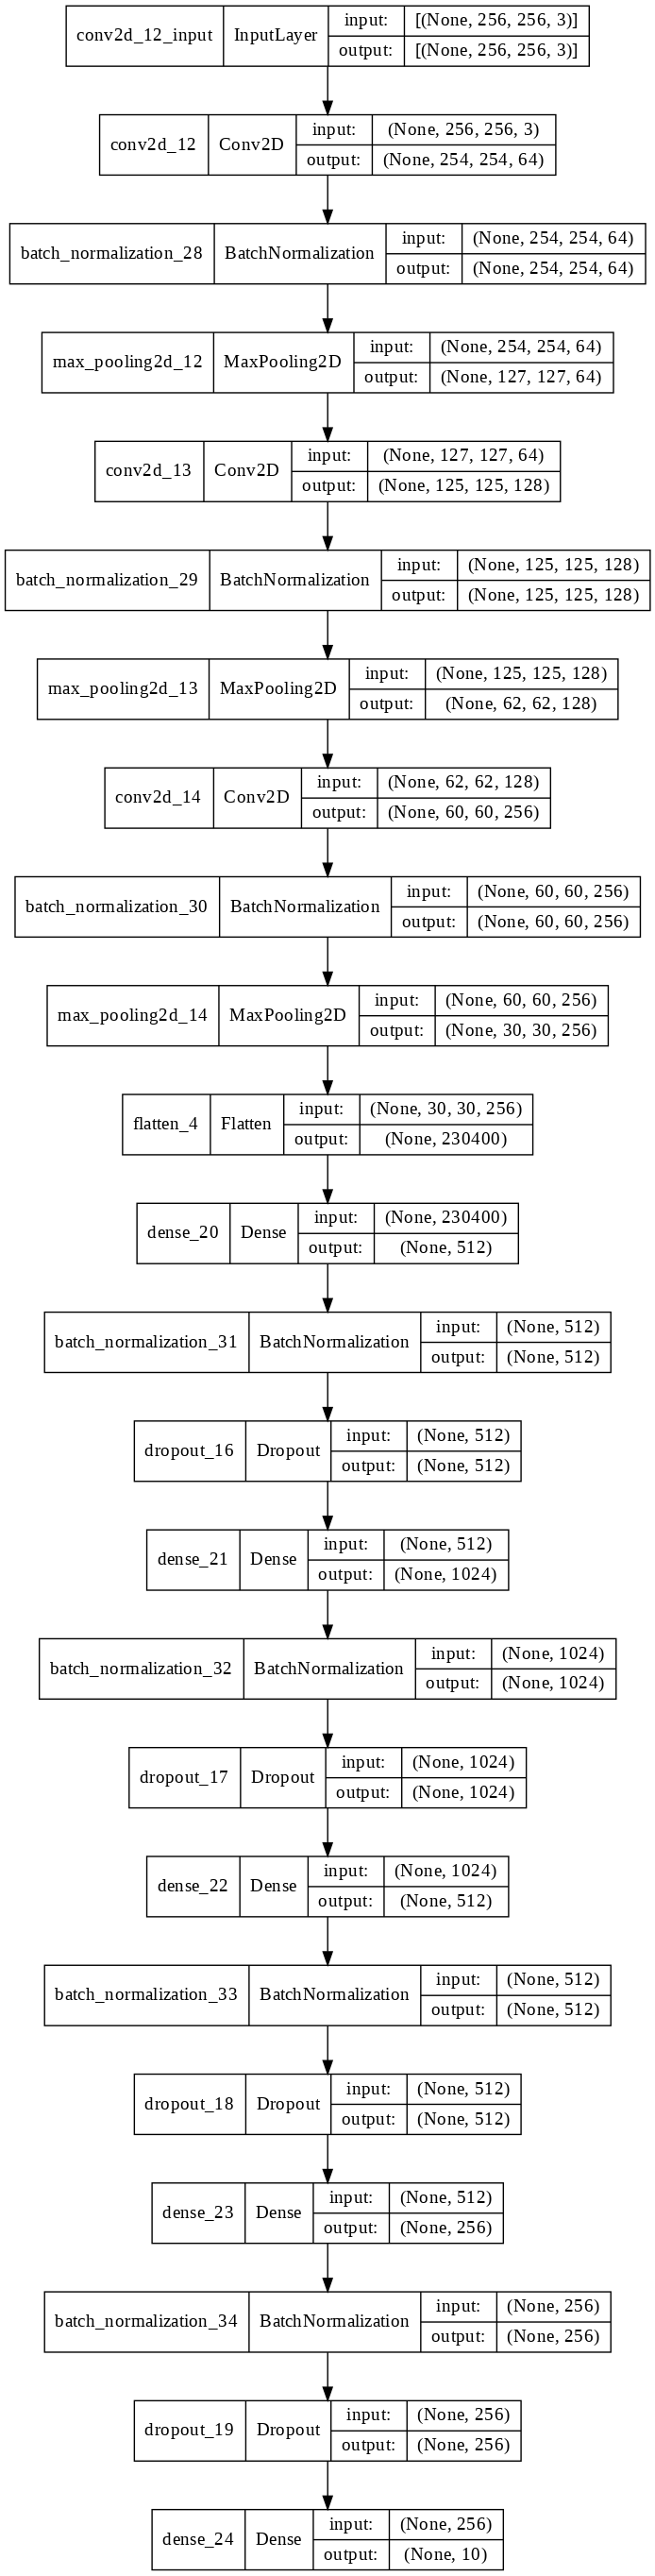

In [17]:
plot_model(model, to_file='model_plot.png',show_shapes=True,show_layer_names=True,rankdir="TB",dpi=100)

In [11]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 batch_normalization_28 (Bat  (None, 254, 254, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 batch_normalization_29 (Bat  (None, 125, 125, 128)    512       
 chNormalization)                                                
                                                      

In [12]:
# Testing Generator
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(root_dir+'test',
                                            batch_size=1,
                                            class_mode = 'categorical',
                                            target_size = (img_width, img_height),
                                            shuffle=False)


Found 1948 images belonging to 1 classes.


In [13]:
#Prediction of test data
filename = test_set.filenames
number_of_samples = len(filename)
y_pred = model.predict_generator(test_set,steps=number_of_samples)
y_pred = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


In [14]:
#getting true label

y_true = np.array([])

for img_url in filename:
  if "TomatoBacterialSpot" in img_url:
    y_true = np.append(y_true,0)
  elif "TomatoEarlyBlight" in img_url:
    y_true = np.append(y_true,1)
  elif "TomatoLateBlight" in img_url:
    y_true = np.append(y_true,2)
  elif "TomatoLeafMold" in img_url:
    y_true = np.append(y_true,3)
  elif "TomatoSeptoriaLeafSpot" in img_url:
    y_true = np.append(y_true,4)
  elif "TomatoSpottedSpiderMite" in img_url:
    y_true = np.append(y_true,5)
  elif "TomatoTargetSpot" in img_url:
    y_true = np.append(y_true,6)
  elif "TomatoYellowCurlVirus" in img_url:
    y_true = np.append(y_true,7)
  elif "TomatoMosaicVirus" in img_url:
    y_true = np.append(y_true,8)
  elif "TomatoHealthy" in img_url:
    y_true = np.append(y_true,9)

In [15]:
diseases_title = ["BacterialSpot","EarlyBlight","LateBlight","LeafMold","SeptoriaLeafSpot","SpottedSpiderMite",
                  "TargetSpot","YellowCurlVirus","MosaicVirus","Healthy"]

                   precision    recall  f1-score   support

    BacterialSpot       0.94      0.96      0.95       170
      EarlyBlight       0.95      0.83      0.88       187
       LateBlight       0.85      0.98      0.91       199
         LeafMold       0.85      0.99      0.91       194
 SeptoriaLeafSpot       0.99      0.89      0.93       185
SpottedSpiderMite       0.96      0.94      0.95       236
       TargetSpot       0.95      0.86      0.90       206
  YellowCurlVirus       0.96      0.99      0.97       177
      MosaicVirus       0.96      0.99      0.98       188
          Healthy       0.99      0.94      0.97       206

         accuracy                           0.94      1948
        macro avg       0.94      0.94      0.94      1948
     weighted avg       0.94      0.94      0.94      1948



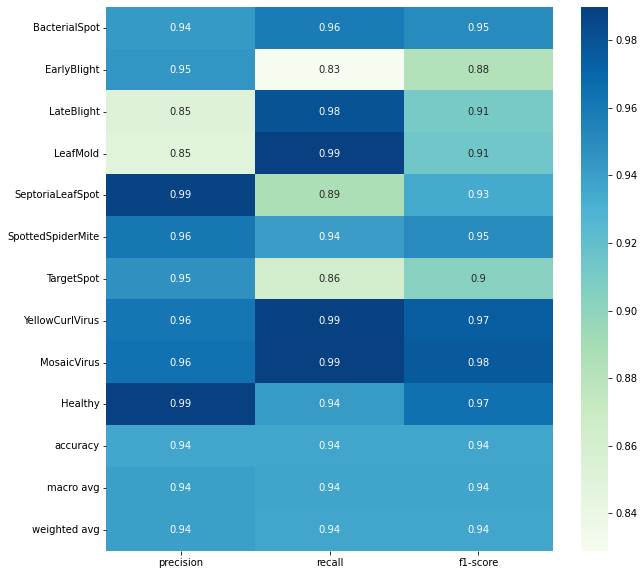

In [16]:
#Classification Report

print(classification_report(y_true, y_pred, target_names=diseases_title))
clr = classification_report(y_true, y_pred,output_dict=True, target_names=diseases_title)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pd.DataFrame(clr).iloc[:-1, :].T, annot=True,cmap = "GnBu")



In [71]:
#Test set accuracy
accuracy_score(y_true,y_pred)

0.9363449691991786

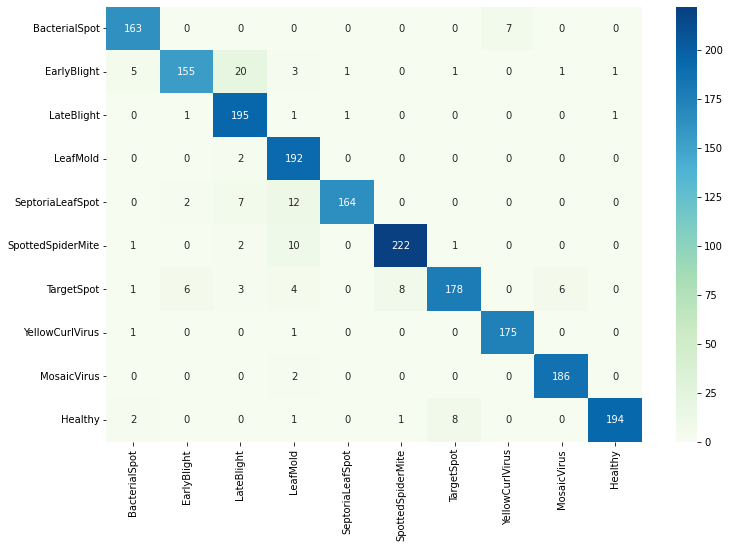

In [76]:
#Plotting Confusion Matrix
plt.figure(figsize=[12,8])
sns.heatmap(confusion_matrix(y_true,y_pred),annot = True, fmt = "d", cmap = "GnBu",xticklabels=diseases_title,yticklabels=diseases_title);